In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
#E:\Pattern Recognition\DigitRecognizer\data


images = np.load('/mnt/e/Pattern Recognition/DigitRecognizer/data/images.npy')
labels = np.load('/mnt/e/Pattern Recognition/DigitRecognizer/data/labels.npy')

In [3]:
pd.value_counts(pd.Series(labels))

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

Correct label for this number is 5


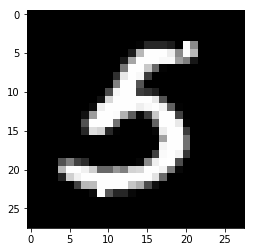

In [4]:
plt.imshow(images[679,:,:], cmap='gray')
print('Correct label for this number is {}'.format(labels[679]))

In [5]:
print(type(images))
print(np.amin(images))
print(np.amax(images))
print(images[679,:,:].dtype)
print(np.shape(images))

<class 'numpy.ndarray'>
0.0
255.0
float32
(60000, 28, 28)


#### Next step is to transfer dtype into uint8
#### Then create a negative variant of array 

In [6]:
#transfere everything to uint8 

im = np.empty(np.shape(images), dtype = 'uint8')
im[:,:,:] = images[:,:,:]

In [7]:
#create negative array

neg = np.empty(np.shape(im), dtype = 'uint8')
neg[:,:,:] = 255-images[:,:,:]

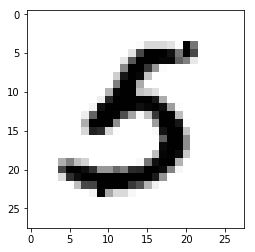

In [8]:
plt.imshow(neg[679,:,:], cmap='gray')

#### Next step is to make thresholding of the image, in this case all pixels > than 200 will be black and < than 200 will be white

In [63]:
thresh = np.empty(np.shape(neg), dtype='uint8')
thresh[neg < 100] = 0 #black
thresh[neg > 100] = 255 #white

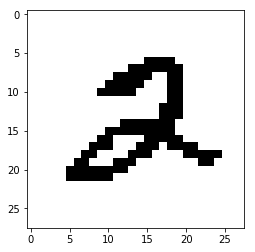

In [64]:
plt.imshow(thresh[5,:,:], cmap = 'gray')

In [65]:
labels[6]

1